# __Exploring the Weather in Athens__

In this assignment we will explore the weather in Athens over a period of more than 50 years.

> Ilias Dimos <br />
> Msc Business Analytics <br />
> Assignment 1  <br />
> AM : f2822102

 # __Questions__

## __Question 1 : Obtain the Data__
In the first question our goal is to gather information about the tempertures in Athens for the years 1955-2020 . In order to achieve that we used 2 datasets.
The first one named "2864567" contains data about the Location of the Station , the date that the temperature was observed , the PRCP and the minimum , maximum and average temperature of that day. Because of the a lot of Missing values that we have ,  we used a second dataset called "Athens" that gathers us with information for the years 2010-2019 in order to help us fill the most of the missing values.

__Usefull libraries for our Analysis__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *
from matplotlib import style
import warnings
from IPython.display import display
%matplotlib inline

__Importing the data.__

In [2]:
temps = pd.read_csv("2864567.csv")
temps_10_19 = pd.read_csv("athens.csv",header=None)
warnings.filterwarnings('ignore')
display(len(temps))
display(len(temps_10_19))

23251

3652

The values of the "PRCP" column are in inches. With the "lambda" function we were able to transform them
into the European metric system(mm).

In [3]:
temps["PRCP"] = temps.apply(lambda x: (x["PRCP"]/0.039370),axis=1)
temps.head(10)

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1/1/1955,0.000000,NaN,NaN,65.0,50.0
1,GR000016716,"HELLINIKON, GR",1/2/1955,2.032004,NaN,NaN,58.0,45.0
2,GR000016716,"HELLINIKON, GR",1/3/1955,0.000000,NaN,NaN,60.0,49.0
3,GR000016716,"HELLINIKON, GR",1/4/1955,0.000000,NaN,NaN,66.0,45.0
4,GR000016716,"HELLINIKON, GR",1/5/1955,0.000000,NaN,NaN,64.0,47.0
5,GR000016716,"HELLINIKON, GR",1/6/1955,0.000000,NaN,NaN,67.0,48.0
6,GR000016716,"HELLINIKON, GR",1/7/1955,0.000000,NaN,NaN,64.0,47.0
7,GR000016716,"HELLINIKON, GR",1/8/1955,0.000000,NaN,NaN,64.0,56.0
8,GR000016716,"HELLINIKON, GR",1/9/1955,3.048006,NaN,NaN,63.0,54.0
9,GR000016716,"HELLINIKON, GR",1/10/1955,0.000000,NaN,NaN,64.0,47.0


In this part of the code we rename the columns of the "temps_10_19" dataset into the ones that the Documentation provides us.

In [4]:
temps_10_19.rename(columns = {0 : 'DATE', 1 : 'TAVG' , 2 : 'TMAX' , 3 : 'TMIN', 4 :'Humidity(%)' , 5 : 'Atmospheric Pressure',6:"Cummulative RainFall" ,10 :"PRCP" , 11 : 'Avg Windspeed',12:'Wind Direction',13:'Wind Gust(km/h)', },inplace = True)
temps_10_19.head(10)

,DATE,TAVG,TMAX,TMIN,Humidity(%),Atmospheric Pressure,Cummulative RainFall,7,8,9,PRCP,Avg Windspeed,Wind Direction,Wind Gust(km/h)
0,1/1/2010,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,1/2/2010,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,1/3/2010,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,1/4/2010,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,1/5/2010,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
5,1/6/2010,16.8,16.9,16.8,79.3,83,72,1012.9,1015.6,1011.1,0.0,15.2,S,34.3
6,1/7/2010,16.6,16.6,16.5,80.3,88,75,1016.3,1019.9,1012.9,0.0,4.5,SSE,11.9
7,1/8/2010,16.1,16.2,16,79.9,89,70,1019.5,1021.4,1016.9,0.0,3.5,E,11.2
8,1/9/2010,17.2,17.2,17.1,77.1,85,70,1014.7,1016.8,1012.1,0.0,9.0,SSE,21.7
9,1/10/2010,14.3,14.4,14.3,61.9,85,38,1012.0,1014.3,1009.6,0.0,5.3,SW,15.7


As we can see the names of the columns has successfully changed.We can observe that the columns 7,8,9 have no names. This is because the documentation doesnt provide us with info for the spesific columns.
Also is very important to check how many missing values we have exactly.


In [5]:
# display(temps_10_19.isnull().sum())
# display(temps.isnull().sum())

In [6]:
temps["DATE"]=pd.to_datetime(temps["DATE"],format='%m/%d/%Y')
temps_10_19["DATE"]=pd.to_datetime(temps_10_19["DATE"],format='%m/%d/%Y')

For our analysis we dont need the colums "7","8","9" ,"Humidity","Atmospheric Pressure" , "Wind Speed" , "Wind Direction" and "Wind Gust" . So we will "drop" them. As far as the "2864567" dataset is concerned the columns that we do not need  are the "Station" and the "Name".

In [7]:
temps= temps.drop(["STATION","NAME"],axis=1)
temps_10_19=temps_10_19.drop([7,8,9,"Humidity(%)","Atmospheric Pressure","Avg Windspeed" , "Wind Direction","Wind Gust(km/h)"],axis=1)
display(temps.head(10))
display(temps_10_19.head(10))

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,1955-01-01,0.000000,NaN,NaN,65.0,50.0
1,1955-01-02,2.032004,NaN,NaN,58.0,45.0
2,1955-01-03,0.000000,NaN,NaN,60.0,49.0
3,1955-01-04,0.000000,NaN,NaN,66.0,45.0
4,1955-01-05,0.000000,NaN,NaN,64.0,47.0
5,1955-01-06,0.000000,NaN,NaN,67.0,48.0
6,1955-01-07,0.000000,NaN,NaN,64.0,47.0
7,1955-01-08,0.000000,NaN,NaN,64.0,56.0
8,1955-01-09,3.048006,NaN,NaN,63.0,54.0
9,1955-01-10,0.000000,NaN,NaN,64.0,47.0


,DATE,TAVG,TMAX,TMIN,Cummulative RainFall,PRCP
0,2010-01-01,17.9,18.1,17.8,33,0.2
1,2010-01-02,15.6,15.7,15.5,45,0.0
2,2010-01-03,13.5,13.6,13.4,39,0.0
3,2010-01-04,9.5,9.6,9.5,38,0.0
4,2010-01-05,13.4,13.5,13.4,54,0.0
5,2010-01-06,16.8,16.9,16.8,72,0.0
6,2010-01-07,16.6,16.6,16.5,75,0.0
7,2010-01-08,16.1,16.2,16,70,0.0
8,2010-01-09,17.2,17.2,17.1,70,0.0
9,2010-01-10,14.3,14.4,14.3,38,0.0


We notice that the Temperature Metric in these two datasets is diferent. The one uses Fareheit and the second one Celcius.We will tranform the first dataset to celcius for better convinience.

In [8]:
temps['TMAX']=temps.apply(lambda x: (x['TMAX']-32)*5/9,axis=1)
temps['TMIN']=temps.apply(lambda x: (x['TMIN']-32)*5/9,axis=1)
temps['TAVG']=temps.apply(lambda x: (x['TAVG']-32)*5/9,axis=1)

In [9]:
display(temps)
display(temps.isnull().sum())

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,1955-01-01,0.000000,NaN,NaN,18.333333,10.000000
1,1955-01-02,2.032004,NaN,NaN,14.444444,7.222222
2,1955-01-03,0.000000,NaN,NaN,15.555556,9.444444
3,1955-01-04,0.000000,NaN,NaN,18.888889,7.222222
4,1955-01-05,0.000000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...
23246,2020-12-27,0.000000,NaN,16.666667,NaN,NaN
23247,2020-12-28,6.604013,NaN,15.000000,18.333333,11.666667
23248,2020-12-29,0.000000,NaN,16.111111,20.000000,12.222222
23249,2020-12-30,0.000000,NaN,16.666667,20.000000,15.000000


DATE        0
PRCP      478
SNWD    23221
TAVG     2311
TMAX      944
TMIN      833
dtype: int64

The "TMAX" and "TMIN" columns have successfully changed to Celsius. Now the only thing that is remained is to fill the NaN values by trying to merge the two datasets in order to import the missing date values and fill as many gaps as we can. Also the columns "SNWD" and "Cummulative RainFall" are of minimum use so we will "drop" them.

In [10]:
final=temps.set_index("DATE").combine_first(temps_10_19.set_index("DATE")).reset_index()

In [11]:
final= final.drop(["SNWD","Cummulative RainFall"],axis=1)
display(final)
display(final.isnull().sum())

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.000000,NaN,18.333333,10.0
1,1955-01-02,2.032004,NaN,14.444444,7.222222
2,1955-01-03,0.000000,NaN,15.555556,9.444444
3,1955-01-04,0.000000,NaN,18.888889,7.222222
4,1955-01-05,0.000000,NaN,17.777778,8.333333
...,...,...,...,...,...
24099,2020-12-27,0.000000,16.666667,NaN,NaN
24100,2020-12-28,6.604013,15.0,18.333333,11.666667
24101,2020-12-29,0.000000,16.111111,20.0,12.222222
24102,2020-12-30,0.000000,16.666667,20.0,15.0


DATE       0
PRCP     376
TAVG    2311
TMAX     124
TMIN     384
dtype: int64

For our future calculations is really needed to tranform the data type of the "TAVG" , "TMAX" , "TMIN" columns into numeric.

In [12]:
final['TAVG'] = pd.to_numeric(final['TAVG'],errors = 'coerce')
final['TMAX'] = pd.to_numeric(final['TMAX'],errors = 'coerce')
final['TMIN'] = pd.to_numeric(final['TMIN'],errors = 'coerce')
final

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.000000,NaN,18.333333,10.000000
1,1955-01-02,2.032004,NaN,14.444444,7.222222
2,1955-01-03,0.000000,NaN,15.555556,9.444444
3,1955-01-04,0.000000,NaN,18.888889,7.222222
4,1955-01-05,0.000000,NaN,17.777778,8.333333
...,...,...,...,...,...
24099,2020-12-27,0.000000,16.666667,NaN,NaN
24100,2020-12-28,6.604013,15.000000,18.333333,11.666667
24101,2020-12-29,0.000000,16.111111,20.000000,12.222222
24102,2020-12-30,0.000000,16.666667,20.000000,15.000000


By displaying the min and the max value of the "Date" column we get a indication that all the data have been combined correctly.

In [13]:
display(min(final.DATE))
display(max(final.DATE))

Timestamp('1955-01-01 00:00:00')

Timestamp('2020-12-31 00:00:00')

In [14]:
display(final.isnull().sum())
display(final.dtypes)

DATE       0
PRCP     376
TAVG    2312
TMAX     125
TMIN     385
dtype: int64

DATE    datetime64[ns]
PRCP           float64
TAVG           float64
TMAX           float64
TMIN           float64
dtype: object

In the above shell we see how many NaN values we have in our dataset after the implemetation of all the nesessary steps for the combination.Its  wrong to delete the NaN values as we lose information. For example , if we deside to erase every row that have NaN value we may delete and other shells that contain information about the specifc day.

In [15]:
final_temps=final
display(final_temps.isnull().sum())

DATE       0
PRCP     376
TAVG    2312
TMAX     125
TMIN     385
dtype: int64

In [16]:
print(final_temps.round(2))
print(len(final_temps))

            DATE  PRCP   TAVG   TMAX   TMIN
0     1955-01-01  0.00    NaN  18.33  10.00
1     1955-01-02  2.03    NaN  14.44   7.22
2     1955-01-03  0.00    NaN  15.56   9.44
3     1955-01-04  0.00    NaN  18.89   7.22
4     1955-01-05  0.00    NaN  17.78   8.33
...          ...   ...    ...    ...    ...
24099 2020-12-27  0.00  16.67    NaN    NaN
24100 2020-12-28  6.60  15.00  18.33  11.67
24101 2020-12-29  0.00  16.11  20.00  12.22
24102 2020-12-30  0.00  16.67  20.00  15.00
24103 2020-12-31  0.00  15.56  18.33    NaN

[24104 rows x 5 columns]
24104


## __QUESTION 2 : Deviation of Summer Temperatures__ 

The Hellenic National Meteorological Service has published a report on extreme weather events for 2020. The report is available at http://www.hnms.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf. In page 7 of the report there is a graph showing the mean summer temperature deviation from a baseline of 1971-2000. You will create your own version of the graph, using a baseline of 1974-1999. Your graph should look like the one below. The line that runs through the graph is the 10 years rolling avarege of the deviation from the mean. What is your intepretation of the figure?

### __Diagram creation process__ 

__In this section we will create a diagramm for the temperatures in Summer for the years 1974 to 1999. The first step is to create a new dataset that contains only the Summer months.__


In [17]:
summer= final_temps.loc[(final_temps["DATE"].dt.month==6) | (final_temps["DATE"].dt.month==7) | (final_temps["DATE"].dt.month==8)]

In [18]:
summer
display(summer)
display(summer.isnull().sum())

,DATE,PRCP,TAVG,TMAX,TMIN
151,1955-06-01,0.0,NaN,26.111111,17.777778
152,1955-06-02,0.0,NaN,26.666667,17.222222
153,1955-06-03,0.0,NaN,26.111111,17.222222
154,1955-06-04,0.0,NaN,26.666667,18.888889
155,1955-06-05,0.0,NaN,27.222222,17.777778
...,...,...,...,...,...
23977,2020-08-27,0.0,28.333333,34.444444,23.333333
23978,2020-08-28,0.0,29.444444,35.555556,22.222222
23979,2020-08-29,0.0,29.444444,35.555556,22.777778
23980,2020-08-30,0.0,27.777778,34.444444,22.222222


DATE      0
PRCP     73
TAVG    590
TMAX     19
TMIN     53
dtype: int64

In order to find the mean for the baseline we have to take the obsevations between the 1974-1999 and compute their mean.After that we will substract the mean for every year for 1995-2020.

In [19]:
summer_74_99 = summer.loc[(summer["DATE"].dt.year>= 1974) & (summer["DATE"].dt.year<=1999)]
summer_74_99

,DATE,PRCP,TAVG,TMAX,TMIN
7091,1974-06-01,0.000000,22.777778,26.666667,17.222222
7092,1974-06-02,0.000000,23.333333,27.777778,20.000000
7093,1974-06-03,0.254001,22.222222,26.666667,20.000000
7094,1974-06-04,2.540005,21.111111,24.444444,18.333333
7095,1974-06-05,0.000000,23.888889,31.666667,18.333333
...,...,...,...,...,...
16309,1999-08-27,0.000000,24.444444,29.444444,21.111111
16310,1999-08-28,0.000000,24.444444,29.444444,20.555556
16311,1999-08-29,0.000000,25.555556,30.000000,20.000000
16312,1999-08-30,0.000000,26.111111,31.666667,21.111111


__The baseline mean of the Summer can be found by ".mean" function.__

In [20]:
print("The Baseline Mean is : " , summer_74_99.TAVG.mean())

The Baseline Mean is :  26.22776380739502


__After computing the mean , we need to "groupby" the dataset by "YEAR" in order to have a grouped Baseline Value of every year seperately. Then we construct the new column "Baseline" and we substruct the Baseline Mean in every Year.__ 

In [21]:
summer['YEAR'] =  pd.to_datetime(summer['DATE']).dt.year
only_years=summer.groupby([(summer.YEAR)]).mean().reset_index()
only_years["Baseline"]=only_years["TAVG"] - 26.22776380739502
only_years

,YEAR,PRCP,TAVG,TMAX,TMIN,Baseline
0,1955,0.207066,NaN,30.591787,21.274155,NaN
1,1956,0.030370,NaN,32.004831,22.294686,NaN
2,1957,0.044174,28.100358,32.107488,22.433575,1.872595
3,1958,0.033131,27.041063,31.503623,22.657005,0.813299
4,1959,0.204305,NaN,30.760870,22.028986,NaN
...,...,...,...,...,...,...
61,2016,0.077305,28.176329,28.797826,24.218841,1.948565
62,2017,0.470762,28.079348,30.146498,23.710628,1.851584
63,2018,0.668132,27.409420,31.720531,23.277415,1.181656
64,2019,0.345109,28.013285,31.761111,23.858816,1.785521


__Computation of the 10 year Rolling Mean.__

In [22]:
rolling_windows = only_years.Baseline.rolling(10, min_periods=1)
only_years["rolling_mean"] = rolling_windows.mean()
only_years

,YEAR,PRCP,TAVG,TMAX,TMIN,Baseline,rolling_mean
0,1955,0.207066,NaN,30.591787,21.274155,NaN,NaN
1,1956,0.030370,NaN,32.004831,22.294686,NaN,NaN
2,1957,0.044174,28.100358,32.107488,22.433575,1.872595,1.872595
3,1958,0.033131,27.041063,31.503623,22.657005,0.813299,1.342947
4,1959,0.204305,NaN,30.760870,22.028986,NaN,1.342947
...,...,...,...,...,...,...,...
61,2016,0.077305,28.176329,28.797826,24.218841,1.948565,1.952244
62,2017,0.470762,28.079348,30.146498,23.710628,1.851584,1.937224
63,2018,0.668132,27.409420,31.720531,23.277415,1.181656,1.861137
64,2019,0.345109,28.013285,31.761111,23.858816,1.785521,1.925147


__Creation of the Diagram__

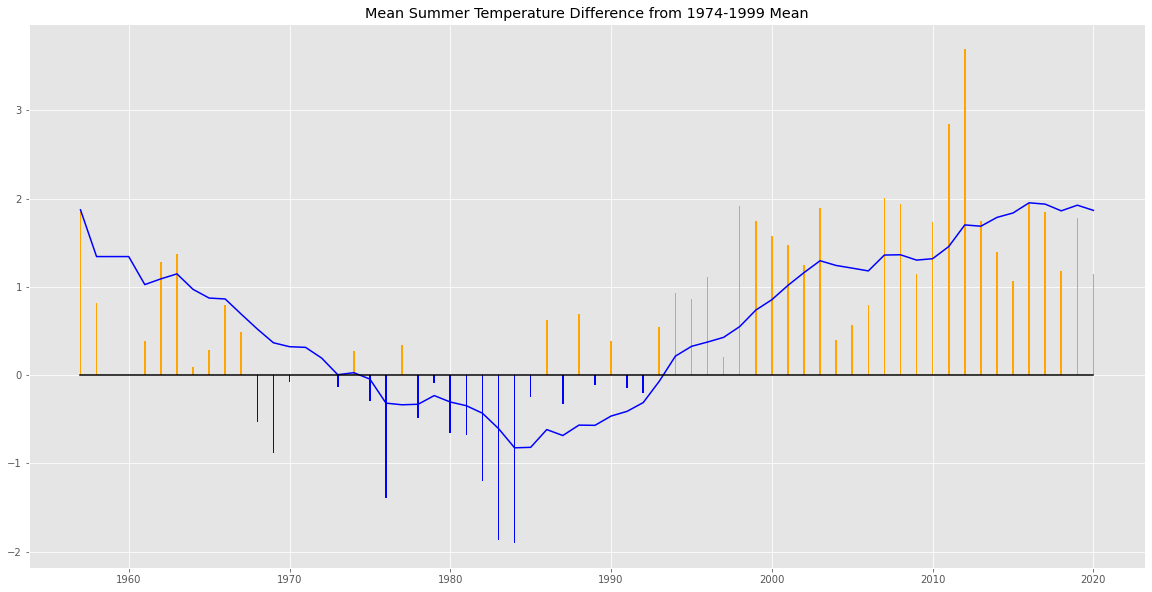

In [23]:
fig=plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
plt.title("Mean Summer Temperature Difference from 1974-1999 Mean")
colors=["orange" if i > 0 else "blue" for i in only_years.Baseline]
plt.bar(only_years.YEAR, only_years.Baseline,color=colors,width=0.1)
plt.plot(only_years.YEAR,only_years.rolling_mean,color="blue")
plt.plot([1957,2020], [0,0],color="black")

### __Interpretation of the graph__

By observing the "Mean Summer Temperature Difference from 1974-1999 Mean" diagramm we can observe that the highest Summer mean temperature was in 2012 and follows the summer of 2017 in Athens. Also, its very clear that from 1968 to 1991 there were the most lowest summer mean tumperatures with the least warmest summer being in 1984.Generally we see a decreace of the mean summer temperatures from 2010 to 2020. 

## __QUESTION 3 : Evolution of Daily Temperatures__ 

You will get the average temperature for each year for the full period from 1955 to 2020. You will then create a plot showing the daily temperature for each year. The line corresponding to each year will be smoothed by using a 30 days rolling average. The lines are colored from light orange to dark orange, progressing through the years in ascending order.On that plot you will overlay a line showing the average daily temperature for the baseline period of 1974-1999 (that is the black line). The line will also be smoothed usng a 30 days rolling average. What is your interpretation of the figure?

### __Diagram creation process__ 

In this section of the assignment we will compute a line graph which shows the average temperature of the full period from 1955 to 2020. First of all we need to calculate the baseline from 1974 - 1999 and adjust the 30 days rolling average.

In [24]:
average_temp_55_20 = final_temps.loc[(final_temps["DATE"].dt.year>= 1955) & (final_temps["DATE"].dt.year<=2020)].reset_index(drop=True)
print(average_temp_55_20)

            DATE      PRCP       TAVG       TMAX       TMIN
0     1955-01-01  0.000000        NaN  18.333333  10.000000
1     1955-01-02  2.032004        NaN  14.444444   7.222222
2     1955-01-03  0.000000        NaN  15.555556   9.444444
3     1955-01-04  0.000000        NaN  18.888889   7.222222
4     1955-01-05  0.000000        NaN  17.777778   8.333333
...          ...       ...        ...        ...        ...
24099 2020-12-27  0.000000  16.666667        NaN        NaN
24100 2020-12-28  6.604013  15.000000  18.333333  11.666667
24101 2020-12-29  0.000000  16.111111  20.000000  12.222222
24102 2020-12-30  0.000000  16.666667  20.000000  15.000000
24103 2020-12-31  0.000000  15.555556  18.333333        NaN

[24104 rows x 5 columns]


In [25]:
average_temp_55_20['DAY'] = pd.to_datetime(average_temp_55_20['DATE']).dt.day
average_temp_55_20['YEAR'] =  pd.to_datetime(average_temp_55_20['DATE']).dt.year
average_temp_55_20['MONTH']= pd.to_datetime(average_temp_55_20['DATE']).dt.month
print(average_temp_55_20)

            DATE      PRCP       TAVG       TMAX       TMIN  DAY  YEAR  MONTH
0     1955-01-01  0.000000        NaN  18.333333  10.000000    1  1955      1
1     1955-01-02  2.032004        NaN  14.444444   7.222222    2  1955      1
2     1955-01-03  0.000000        NaN  15.555556   9.444444    3  1955      1
3     1955-01-04  0.000000        NaN  18.888889   7.222222    4  1955      1
4     1955-01-05  0.000000        NaN  17.777778   8.333333    5  1955      1
...          ...       ...        ...        ...        ...  ...   ...    ...
24099 2020-12-27  0.000000  16.666667        NaN        NaN   27  2020     12
24100 2020-12-28  6.604013  15.000000  18.333333  11.666667   28  2020     12
24101 2020-12-29  0.000000  16.111111  20.000000  12.222222   29  2020     12
24102 2020-12-30  0.000000  16.666667  20.000000  15.000000   30  2020     12
24103 2020-12-31  0.000000  15.555556  18.333333        NaN   31  2020     12

[24104 rows x 8 columns]


In [26]:
grouped_50 = average_temp_55_20.groupby([(average_temp_55_20.YEAR),(average_temp_55_20["DATE"].dt.dayofyear),(average_temp_55_20.MONTH)]).mean().reset_index()
grouped_50

,YEAR,DATE,MONTH,PRCP,TAVG,TMAX,TMIN,DAY
0,1955,1,1,0.000000,NaN,18.333333,10.000000,1
1,1955,2,1,2.032004,NaN,14.444444,7.222222,2
2,1955,3,1,0.000000,NaN,15.555556,9.444444,3
3,1955,4,1,0.000000,NaN,18.888889,7.222222,4
4,1955,5,1,0.000000,NaN,17.777778,8.333333,5
...,...,...,...,...,...,...,...,...
24099,2020,362,12,0.000000,16.666667,NaN,NaN,27
24100,2020,363,12,6.604013,15.000000,18.333333,11.666667,28
24101,2020,364,12,0.000000,16.111111,20.000000,12.222222,29
24102,2020,365,12,0.000000,16.666667,20.000000,15.000000,30


In [27]:
rolling_window = grouped_50.TAVG.rolling(30, min_periods=1)
grouped_50["rolling_mean"] = rolling_window.mean()
grouped_50

,YEAR,DATE,MONTH,PRCP,TAVG,TMAX,TMIN,DAY,rolling_mean
0,1955,1,1,0.000000,NaN,18.333333,10.000000,1,NaN
1,1955,2,1,2.032004,NaN,14.444444,7.222222,2,NaN
2,1955,3,1,0.000000,NaN,15.555556,9.444444,3,NaN
3,1955,4,1,0.000000,NaN,18.888889,7.222222,4,NaN
4,1955,5,1,0.000000,NaN,17.777778,8.333333,5,NaN
...,...,...,...,...,...,...,...,...,...
24099,2020,362,12,0.000000,16.666667,NaN,NaN,27,14.092593
24100,2020,363,12,6.604013,15.000000,18.333333,11.666667,28,14.166667
24101,2020,364,12,0.000000,16.111111,20.000000,12.222222,29,14.166667
24102,2020,365,12,0.000000,16.666667,20.000000,15.000000,30,14.222222


It would be very usefull to have the data collected  for only the years from  1955 to 2020 along with the Average Tempertaures of each
day seperately.Thats why the pivot table has been created. As indexes we use the "MONTH" and the "DAY" columns , and as column the "YEAR".Finally we fill the pivot table with the values of the "rolling mean".

In [28]:
pivot_table=pd.pivot_table(grouped_50,index=["MONTH","DAY"],values="rolling_mean",columns=["YEAR"],dropna=True).reset_index(drop=True)
pivot_table.index = np.arange(1, len(pivot_table)+1)
pivot_table

YEAR,1957,1958,1959,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,NaN,11.500000,12.988506,12.222222,12.333333,11.537037,13.425926,12.759259,13.796296,12.740741,...,13.111111,12.666667,11.311852,10.473333,12.629630,10.833333,8.962963,11.944444,10.666667,12.333333
2,NaN,11.759259,13.115079,12.222222,12.259259,11.611111,13.425926,12.555556,13.759259,12.481481,...,12.833333,12.537037,11.181852,10.516667,12.111111,10.611111,8.777778,11.796296,10.555556,12.111111
3,NaN,12.018519,13.251029,12.592593,12.296296,11.685185,13.333333,12.444444,13.703704,12.370370,...,12.555556,12.388889,11.211852,10.620000,11.740741,10.555556,8.703704,11.685185,10.407407,11.981481
4,NaN,12.259259,13.397436,12.916667,12.203704,11.907407,13.129630,12.444444,13.666667,12.351852,...,12.444444,12.222222,11.185185,10.676667,11.574074,10.611111,8.703704,11.629630,10.166667,11.962963
5,NaN,12.351852,13.488889,13.444444,12.018519,12.092593,12.833333,12.481481,13.481481,12.240741,...,12.370370,11.981481,11.138519,10.713333,11.222222,10.777778,8.814815,11.703704,9.981481,11.907407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,10.703704,12.962963,NaN,12.759259,11.537037,14.129630,13.537037,13.907407,13.518519,12.777778,...,13.018519,12.320000,10.783333,14.037037,11.833333,9.962963,12.629630,10.944444,13.870370,14.092593
363,10.648148,12.962963,NaN,12.740741,11.500000,13.944444,13.481481,13.796296,13.240741,12.910053,...,12.981481,12.180000,10.853333,13.981481,11.722222,9.703704,12.685185,10.685185,13.574074,14.166667
364,10.629630,13.055556,NaN,12.740741,11.370370,13.722222,13.277778,13.833333,13.092593,12.929293,...,12.796296,11.943333,10.910000,13.907407,11.611111,9.444444,12.703704,10.703704,13.129630,14.166667
365,10.777778,13.092593,NaN,12.648148,11.351852,13.574074,13.092593,13.907407,12.962963,12.922705,...,12.759259,11.666667,10.880000,13.481481,11.537037,9.277778,12.500000,10.759259,12.685185,14.222222


__Now we have to calculate the baseline from 1974-1999 and the rolling average for those years.__

In [29]:
baseline_74_99 = final_temps.loc[(final_temps["DATE"].dt.year>= 1974) & (final_temps["DATE"].dt.year<=1999)].reset_index(drop=True) 

In [30]:
print(baseline_74_99)

           DATE     PRCP       TAVG       TMAX       TMIN
0    1974-01-01  0.00000  11.666667  12.777778  10.000000
1    1974-01-02  0.00000  13.888889  15.555556  11.111111
2    1974-01-03  9.90602  12.222222  16.111111  10.555556
3    1974-01-04  0.00000  10.555556  12.777778   8.333333
4    1974-01-05  0.00000   9.444444  11.111111   8.333333
...         ...      ...        ...        ...        ...
9491 1999-12-27  0.00000  15.555556  18.888889  10.555556
9492 1999-12-28  0.00000  16.666667  20.000000  12.777778
9493 1999-12-29  0.00000  15.000000  18.333333  14.444444
9494 1999-12-30  0.00000  13.333333  16.666667   8.333333
9495 1999-12-31  9.90602  15.000000  17.222222  13.333333

[9496 rows x 5 columns]


In [31]:
baseline_74_99['DAY'] = pd.to_datetime(baseline_74_99['DATE']).dt.day
baseline_74_99['YEAR'] =  pd.to_datetime(baseline_74_99['DATE']).dt.year
baseline_74_99['MONTH']= pd.to_datetime(baseline_74_99['DATE']).dt.month
baseline_74_99

,DATE,PRCP,TAVG,TMAX,TMIN,DAY,YEAR,MONTH
0,1974-01-01,0.00000,11.666667,12.777778,10.000000,1,1974,1
1,1974-01-02,0.00000,13.888889,15.555556,11.111111,2,1974,1
2,1974-01-03,9.90602,12.222222,16.111111,10.555556,3,1974,1
3,1974-01-04,0.00000,10.555556,12.777778,8.333333,4,1974,1
4,1974-01-05,0.00000,9.444444,11.111111,8.333333,5,1974,1
...,...,...,...,...,...,...,...,...
9491,1999-12-27,0.00000,15.555556,18.888889,10.555556,27,1999,12
9492,1999-12-28,0.00000,16.666667,20.000000,12.777778,28,1999,12
9493,1999-12-29,0.00000,15.000000,18.333333,14.444444,29,1999,12
9494,1999-12-30,0.00000,13.333333,16.666667,8.333333,30,1999,12


In [32]:
grouped_baseline = baseline_74_99.groupby([(baseline_74_99.DATE.dt.dayofyear),(baseline_74_99.MONTH)]).mean().reset_index()

In [33]:
rolling_window = grouped_baseline.TAVG.rolling(30, min_periods=1)
grouped_baseline["rolling_avg"] = rolling_window.mean()
grouped_baseline.drop(['TMAX','TMIN'], axis = 1)
grouped_baseline.index = np.arange(1, len(grouped_baseline)+1)
grouped_baseline

,DATE,MONTH,PRCP,TAVG,TMAX,TMIN,DAY,YEAR,rolling_avg
1,1,1,1.905004,10.363248,13.931624,7.628205,1.000000,1986.5,10.363248
2,2,1,0.654540,10.705128,13.931624,7.692308,2.000000,1986.5,10.534188
3,3,1,1.426311,10.213675,13.974359,7.585470,3.000000,1986.5,10.427350
4,4,1,0.175847,9.594017,13.354701,6.260684,4.000000,1986.5,10.219017
5,5,1,0.048846,9.957265,13.696581,6.880342,5.000000,1986.5,10.166667
...,...,...,...,...,...,...,...,...,...
372,362,12,1.064848,10.277778,13.824786,6.901709,27.769231,1986.5,11.564767
373,363,12,0.928079,10.662393,14.316239,7.564103,28.769231,1986.5,11.504938
374,364,12,0.615463,11.025641,14.444444,7.948718,29.769231,1986.5,11.424929
375,365,12,1.934312,11.111111,14.273504,7.970085,30.769231,1986.5,11.386040


__Creation of the Diagram__


<AxesSubplot:xlabel='DATE', ylabel='Average Daily Temperatures'>

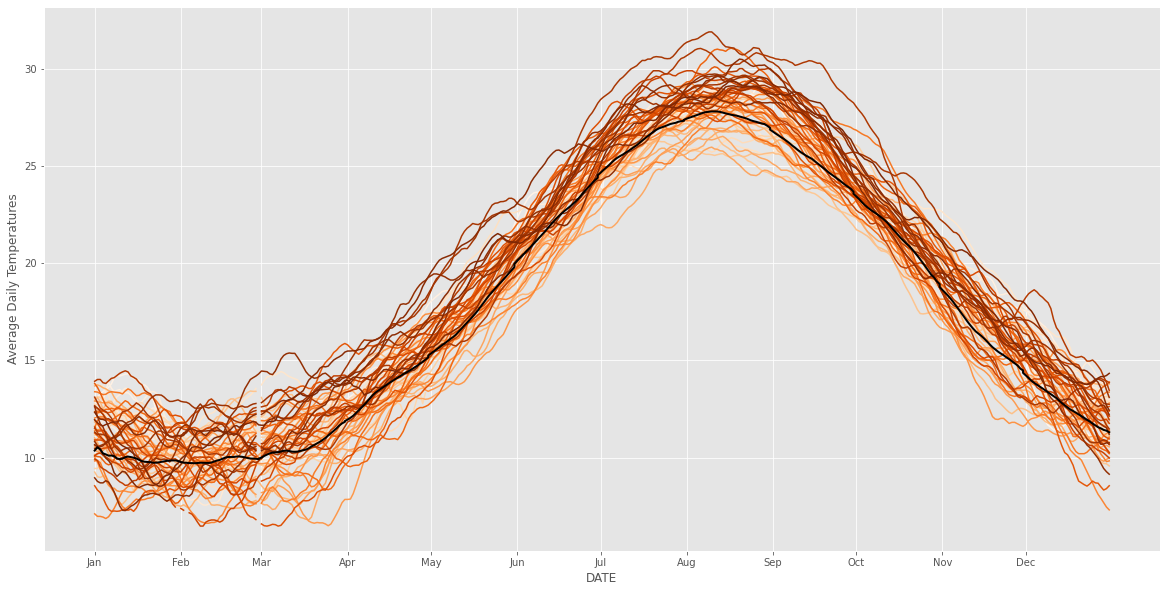

In [34]:
plt.style.use('ggplot')
month_margins = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
ax=pivot_table.plot.line(xlabel="DATE",ylabel="Average Daily Temperatures",cmap="Oranges",figsize=(20,10),legend=False)
ax.set_xticklabels(month_names)
ax.set_xticks(month_margins)
grouped_baseline.plot.line(x="DATE",y="rolling_avg",color="black",figsize=(20,10),legend=False,ax=ax,lw=2, ylabel="Average Daily Temperatures",xlabel="DATE")

### __Interpretation of the graph__

Observing the graph we can notice that the Average Daily Temperatures are significatly higher in Summer . With the end of Summer season cames the end of high temperatures thus from Septemper the average mean temperature drops dramaticaly reaching at its lowest temperature at December. Also we can say that the hot days from 1955 to 2020 are observed between June and in mid September as the majority of the lines of the graph have darker color at these months.Finally based on the color of the lines we can say that the colder days are from December to March as their line color is ligher in comparison with the other months.We can also notice that at the beginning of March there is a break in the lines  that stops the continuation of the diagram. That is because in this period there were NaN values that we desided not to drop them.It means thats there is no available temperature for this year for specific days.

## __QUESTION 4 : Extreme Temperature Events__ 

Another mesure used by climatologists is the number of extreme events. Extreme events are defined as those beyond 5% or 10% from the expected value. We will deal with extreme heat events going 10% above the baseline.You will count the number of extreme temperature events per year, compared to the baseline of 1974-1999. You should should produce a graph like the one that follows. The vertical axis is the percentage of extreme heat events calculated over the number of observations for each year. The gray line in the middle is the average percentage of extreme tempearture events of the baseline. The colour blue is used for those years where the percentage is below the baseline; otherwise the colour is orange. What is your interpretation of the graph?

### __Diagram creation process.__

### __Creation of the Baseline threshhold for years 1974-1999.__

In [35]:
baseline_dataset = final_temps.loc[(final_temps["DATE"].dt.year>= 1974) & (final_temps["DATE"].dt.year<=1999)].reset_index(drop=True)
baseline_extreme= baseline_dataset.drop(["PRCP","TMAX","TMIN"],axis=1)
baseline_extreme['DAY'] = pd.to_datetime(baseline_extreme['DATE']).dt.day
baseline_extreme['YEAR'] =  pd.to_datetime(baseline_extreme['DATE']).dt.year
baseline_extreme['MONTH']= pd.to_datetime(baseline_extreme['DATE']).dt.month
baseline_extreme

,DATE,TAVG,DAY,YEAR,MONTH
0,1974-01-01,11.666667,1,1974,1
1,1974-01-02,13.888889,2,1974,1
2,1974-01-03,12.222222,3,1974,1
3,1974-01-04,10.555556,4,1974,1
4,1974-01-05,9.444444,5,1974,1
...,...,...,...,...,...
9491,1999-12-27,15.555556,27,1999,12
9492,1999-12-28,16.666667,28,1999,12
9493,1999-12-29,15.000000,29,1999,12
9494,1999-12-30,13.333333,30,1999,12


In [36]:
grouped_baseline_extreme= baseline_extreme.groupby([(baseline_extreme.DATE.dt.dayofyear)]).mean().reset_index()
grouped_baseline_extreme["TAVG"] = grouped_baseline_extreme["TAVG"] + grouped_baseline_extreme["TAVG"] * 0.1
grouped_baseline_extreme.drop(["DAY","MONTH","YEAR"],axis=1)


,DATE,TAVG
0,1,11.399573
1,2,11.775641
2,3,11.235043
3,4,10.553419
4,5,10.952991
...,...,...
361,362,11.305556
362,363,11.728632
363,364,12.128205
364,365,12.222222


 ### __Filtering the years 1974-1999 in order to find the baseline mean.__

In [37]:
filtered_74_99 =  final_temps.loc[(final_temps["DATE"].dt.year>= 1974) & (final_temps["DATE"].dt.year<=1999)]
filtered_74_99['DAY'] = pd.to_datetime(filtered_74_99['DATE']).dt.day
filtered_74_99['YEAR'] =  pd.to_datetime(filtered_74_99['DATE']).dt.year
filtered_74_99['MONTH']= pd.to_datetime(filtered_74_99['DATE']).dt.month
filtered= filtered_74_99.drop(["PRCP","TMAX","TMIN","MONTH"],axis=1)

In order to have a bigger picture about the temperatures for every year and day we unstacked the "filtered" dataset.

In [38]:
filtered_df=filtered.set_index([filtered.DATE.dt.dayofyear,"YEAR"])["TAVG"].unstack()
filtered_df

YEAR,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
DATE,,,,,,,,,,,,,,,,,,,,,
1,11.666667,8.888889,11.111111,10.000000,7.222222,16.666667,10.555556,7.777778,11.666667,1.666667,...,9.444444,11.111111,3.333333,7.777778,12.222222,17.777778,13.888889,12.777778,9.444444,8.888889
2,13.888889,7.222222,12.222222,8.888889,4.444444,14.444444,11.111111,8.333333,15.000000,4.444444,...,8.888889,13.333333,5.000000,8.333333,12.222222,17.777778,13.888889,11.666667,10.555556,10.000000
3,12.222222,7.777778,13.333333,8.888889,6.111111,4.444444,11.111111,6.666667,11.111111,5.555556,...,8.333333,10.555556,9.444444,9.444444,10.555556,12.222222,12.777778,12.777778,12.222222,13.333333
4,10.555556,7.222222,13.333333,7.222222,8.888889,3.888889,5.000000,11.666667,10.000000,7.777778,...,6.111111,10.555556,9.444444,7.222222,10.000000,10.555556,10.000000,15.555556,12.222222,13.333333
5,9.444444,7.777778,8.333333,6.111111,9.444444,15.555556,3.333333,13.333333,10.555556,10.000000,...,4.444444,11.666667,10.555556,5.555556,12.222222,11.111111,8.333333,15.555556,12.777778,11.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,11.666667,8.888889,8.333333,7.777778,13.888889,7.222222,10.000000,10.000000,8.888889,12.222222,...,12.222222,5.555556,5.000000,12.777778,10.000000,15.555556,6.666667,12.777778,9.444444,16.666667
363,11.666667,9.444444,5.555556,12.222222,13.888889,8.888889,11.111111,11.666667,8.888889,10.555556,...,12.222222,4.444444,5.000000,11.666667,9.444444,15.000000,5.555556,12.777778,10.000000,15.000000
364,12.222222,9.444444,7.222222,15.000000,15.000000,11.666667,9.444444,14.444444,5.555556,10.555556,...,11.111111,3.888889,6.666667,13.888889,11.111111,13.888889,7.222222,11.111111,10.555556,13.333333


The "lambda" function below in combination with the "np.where" function is used for the comparison we need in order to find the extreme heat events.
Every shell of the "set_index" table is compared with every value of the baseline TAVG day by day.If the shell is bigger than the TAVG of the baseline then the shell changes to "True" or "1" and if it is less then changes to "0" or "False".The argument ".where(filtered_df.notna()" is used in order for the function not to ovewrite the "NaN" values into "False".We want them as "NaN".

In [39]:
boul_df2 = filtered_df.apply(lambda filtered_df : np.where(filtered_df.values >= grouped_baseline_extreme.TAVG,True,False),axis=0).where(filtered_df.notna())
boul_df2

YEAR,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
DATE,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,1.0,False,0.0,1.0,0.0,...,0.0,0.0,False,0.0,1.0,1.0,True,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,False,0.0,1.0,0.0,...,0.0,1.0,False,0.0,1.0,1.0,True,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,1.0,True,1.0,1.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,False,1.0,0.0,0.0,...,0.0,1.0,False,0.0,0.0,1.0,False,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,False,1.0,0.0,0.0,...,0.0,1.0,False,0.0,1.0,1.0,False,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,0.0,0.0,0.0,1.0,0.0,False,0.0,0.0,1.0,...,1.0,0.0,False,1.0,0.0,1.0,False,1.0,0.0,1.0
363,0.0,0.0,0.0,1.0,1.0,0.0,False,0.0,0.0,0.0,...,1.0,0.0,False,0.0,0.0,1.0,False,1.0,0.0,1.0
364,1.0,0.0,0.0,1.0,1.0,0.0,False,1.0,0.0,0.0,...,0.0,0.0,False,1.0,0.0,1.0,False,0.0,0.0,1.0


After successfully change the values of all the shells in the "set_index" table we need to calculate the Sum of the "True" or "1" in order to find the summary of the extreme events per year. Also for the calculation of the franction we need the total number of observation per year. Thats what "count" function calculates. After their computation we create a new dataframe that has as columns the "count" and the "sum" and we calculate the fraction. Finally with the ".mean" function we were able to find the "Baseline Mean" which will be used for our baseline.

In [40]:
count_filtered=pd.DataFrame(boul_df2.count(axis=0),columns = ['Count']).reset_index()
sum_filtered=pd.DataFrame(boul_df2.sum(axis=0),columns=['Sum']).reset_index()

In [41]:
total_filtered=pd.merge(count_filtered,sum_filtered,how="left",on="YEAR")
total_filtered["Percentage"] = total_filtered.Sum / total_filtered.Count
Baseline_Mean=total_filtered.Percentage.mean()
Baseline_Mean

0.2492960987287044

### __Preperation of the dataset 1955-2020.__

In [42]:
extreme_dataset =  final_temps.loc[(final_temps["DATE"].dt.year>= 1955) & (final_temps["DATE"].dt.year<=2020)]
extreme_dataset['DAY'] = pd.to_datetime(extreme_dataset['DATE']).dt.day
extreme_dataset['YEAR'] =  pd.to_datetime(extreme_dataset['DATE']).dt.year
extreme_dataset['MONTH']= pd.to_datetime(extreme_dataset['DATE']).dt.month
extreme = extreme_dataset.drop(["PRCP","TMAX","TMIN","MONTH"],axis=1)

In [43]:
df=extreme.set_index([extreme.DATE.dt.dayofyear,"YEAR"])["TAVG"].unstack().drop([1955,1956,1959,1960],axis=1)
df

YEAR,1957,1958,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DATE,,,,,,,,,,,,,,,,,,,,,
1,NaN,12.222222,12.222222,12.777778,15.000000,9.444444,11.111111,13.333333,11.666667,15.000000,...,10.000000,10.000000,11.3,9.800000,4.444444,3.888889,6.111111,11.111111,8.333333,8.333333
2,NaN,11.666667,12.222222,13.888889,13.888889,9.444444,11.666667,12.222222,11.111111,15.000000,...,11.666667,9.444444,10.9,11.300000,4.444444,7.777778,8.333333,13.888889,7.222222,7.222222
3,NaN,12.222222,13.333333,16.666667,13.333333,7.777778,14.444444,13.333333,13.333333,14.444444,...,11.111111,9.444444,11.6,11.100000,5.555556,11.666667,11.111111,11.666667,6.666667,8.888889
4,NaN,10.555556,13.888889,11.666667,16.666667,10.555556,15.000000,12.777778,15.000000,11.666667,...,10.000000,11.111111,11.2,10.800000,11.111111,13.333333,11.666667,9.444444,5.555556,10.555556
5,NaN,8.333333,15.555556,8.888889,15.000000,8.888889,11.666667,7.222222,13.888889,9.444444,...,9.444444,11.111111,11.3,11.800000,6.111111,17.222222,13.333333,10.555556,3.888889,9.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,10.000000,12.222222,16.666667,14.444444,12.222222,13.888889,15.000000,8.888889,15.555556,11.666667,...,9.444444,13.200000,13.3,11.666667,11.666667,10.555556,14.444444,8.888889,8.333333,16.666667
363,11.666667,13.333333,17.222222,13.333333,8.888889,12.222222,16.666667,10.555556,13.333333,15.000000,...,8.333333,13.300000,13.0,14.444444,12.222222,7.222222,12.777778,10.555556,6.111111,15.000000
364,15.555556,11.111111,13.888889,16.666667,8.333333,11.666667,16.666667,10.000000,12.777778,12.222222,...,11.666667,12.100000,12.2,5.000000,10.000000,3.888889,11.111111,10.555556,4.444444,16.111111


The "lambda" function below in combination with the "np.where" function is used for the comparison we need in order to find the extreme heat events.
Every shell of the "set_index" table is compared with every value of the baseline TAVG day by day.If the shell is bigger than the TAVG of the baseline then the shell changes to "True" or "1" and if it is less then changes to "0" or "False".The argument ".where(filtered_df.notna())" is used in order for the function not to ovewrite the "NaN" values into "False".We want them as "NaN".

In [44]:
boul_df = df.apply(lambda df : np.where(df.values >= grouped_baseline_extreme.TAVG,True,False),axis=0).where(df.notna())
boul_df

YEAR,1957,1958,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DATE,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,1.0,1.0,1.0,False,0.0,1.0,1.0,True,...,0.0,False,0.0,0.0,0.0,False,0.0,0.0,0.0,False
2,NaN,0.0,1.0,1.0,1.0,False,0.0,1.0,0.0,True,...,0.0,False,0.0,0.0,0.0,False,0.0,1.0,0.0,False
3,NaN,1.0,1.0,1.0,1.0,False,1.0,1.0,1.0,True,...,0.0,False,1.0,0.0,0.0,True,0.0,1.0,0.0,False
4,NaN,1.0,1.0,1.0,1.0,True,1.0,1.0,1.0,True,...,0.0,True,1.0,1.0,1.0,True,1.0,0.0,0.0,True
5,NaN,0.0,1.0,0.0,1.0,False,1.0,0.0,1.0,False,...,0.0,True,1.0,1.0,0.0,True,1.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1.0,1.0,1.0,1.0,True,1.0,0.0,1.0,True,...,0.0,True,1.0,1.0,1.0,False,1.0,0.0,0.0,True
363,0.0,1.0,1.0,1.0,0.0,True,1.0,0.0,1.0,True,...,0.0,True,1.0,1.0,1.0,False,1.0,0.0,0.0,True
364,1.0,0.0,1.0,1.0,0.0,False,1.0,0.0,1.0,True,...,0.0,False,1.0,0.0,0.0,False,0.0,0.0,0.0,True


After successfully change the values of all the shells in the "set_index" table we need to calculate the Sum of the "True" or "1" in order to find the summary of the extreme events per year. Also for the calculation of the franction we need the total number of observation per year. Thats what "count" function calculates. After their computation we create a new dataframe that has as columns the "count" and the "sum" and we calculate the fraction.

In [45]:
count=pd.DataFrame(boul_df.count(axis=0),columns = ['Count']).reset_index()
sum_=pd.DataFrame(boul_df.sum(axis=0),columns=['Sum']).reset_index()

In [46]:
total=pd.merge(count,sum_,how="left",on="YEAR")
total["Percentage"] = total.Sum / total.Count
total

,YEAR,Count,Sum,Percentage
0,1957,184,48.0,0.260870
1,1958,365,136.0,0.372603
2,1961,365,135.0,0.369863
3,1962,365,153.0,0.419178
4,1963,364,145.0,0.398352
...,...,...,...,...
57,2016,366,156.0,0.426230
58,2017,365,169.0,0.463014
59,2018,365,170.0,0.465753
60,2019,365,164.0,0.449315


__Creation of the diagram__


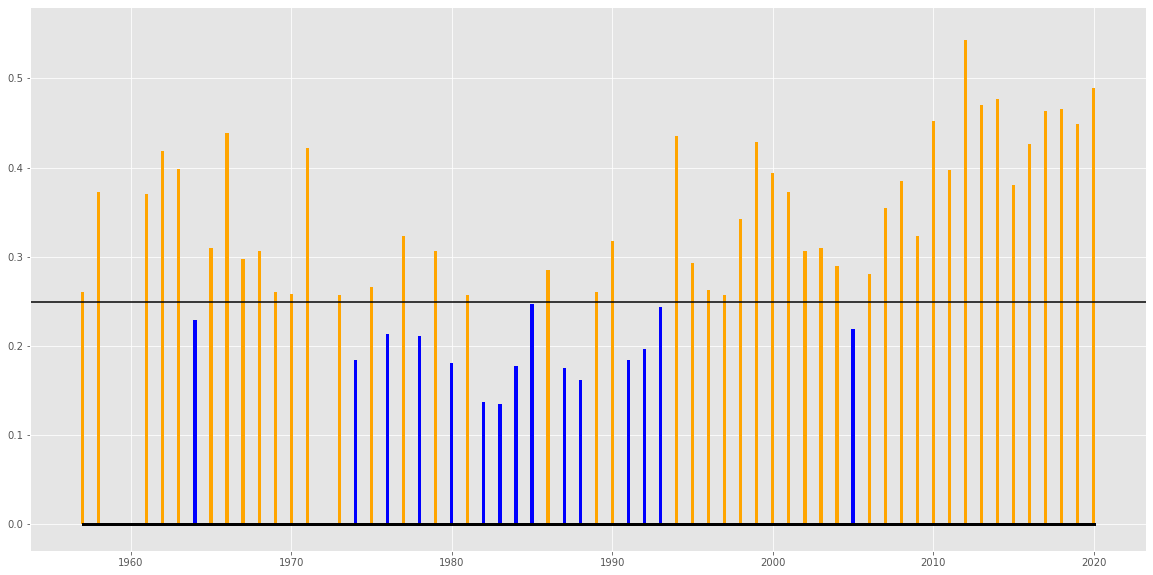

In [47]:
fig=plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
plt.ylim([-0.03,0.58])
plt.axhline(y=Baseline_Mean,color="black")
colors=["orange" if i > Baseline_Mean else "blue" for i in total.Percentage]
plt.bar(total.YEAR,total.Percentage,color=colors,width=0.2)
plt.plot([1957,2020], [0,0],color="black",linewidth=3)

### __Interpretation of the graph__

Observing the graph above we see that the year with the most exetreme heat events was 2012 and the year with the least extreme heats events was 1983.Also we can see that from 2010 to 2020 there is an increase in extreme temperatures in Αthens.Between 1973 and 1993 there were the years with the least extreme  heat events.Generally we can understand that Athens over these 65 years has a lot of exetreme heat events in total .Also the graph shows an indication that the years after 2020 will have also a lot of extreme heat events.


## __QUESTION 5 : Precipitation__ 

Continuing the thread on extreme events, another consideration is rainfall. The weather may or may not be drying up. We are, however, interested in whether precipication becomes more intense over time.To see that, you will count the overall rainfall over the year and the number of rainy days in each year. Then, by dividing the rainfall by the number of rainy days you will get an indication of whether we are getting rain in more concentrated bursts. You will then create a plot showing the ratio of rainfall over rainy days over the years. On the plot you will overlay the 10 years rolling average. The plot should be similar to the one below. What is your interpretation of the plot?

### __Diagram creation process__ 

Firsts of all we have to count the overall rainfall over the year , basically we need the sum of the every year's rainfall, for the years 1955-2020.


In [48]:
overal_rainfalls = final_temps[["DATE","PRCP"]]
grouped_overal_rainfalls=overal_rainfalls.groupby([(overal_rainfalls.DATE.dt.year)]).sum().reset_index()
grouped_overal_rainfalls

,DATE,PRCP
0,1955,547.371095
1,1956,281.432563
2,1957,302.514605
3,1958,350.266701
4,1959,213.868428
...,...,...
61,2016,261.332487
62,2017,304.396596
63,2018,380.422758
64,2019,570.231140


Secondly, we will count the count of the rainy days in each year. In more details , in how many years the "PRCP" was above 0.

In [49]:
rainy_days = overal_rainfalls.loc[(overal_rainfalls["PRCP"]>0)].reset_index(drop=True)
rainy_days

,DATE,PRCP
0,1955-01-02,2.032004
1,1955-01-09,3.048006
2,1955-01-11,0.508001
3,1955-01-19,1.524003
4,1955-01-20,5.588011
...,...,...
3810,2020-11-20,1.016002
3811,2020-11-30,4.064008
3812,2020-12-04,5.588011
3813,2020-12-13,8.890018


In [50]:
rainy_days['DAY'] = pd.to_datetime(rainy_days['DATE']).dt.day
rainy_days['YEAR'] =  pd.to_datetime(rainy_days['DATE']).dt.year
rainy_days['MONTH']= pd.to_datetime(rainy_days['DATE']).dt.month

In [51]:
rainy_days = rainy_days.groupby([(rainy_days.YEAR)]).count().reset_index()
rainy_days

,YEAR,DATE,PRCP,DAY,MONTH
0,1955,67,67,67,67
1,1956,50,50,50,50
2,1957,66,66,66,66
3,1958,65,65,65,65
4,1959,57,57,57,57
...,...,...,...,...,...
61,2016,42,42,42,42
62,2017,48,48,48,48
63,2018,55,55,55,55
64,2019,58,58,58,58


In [52]:
data = [rainy_days["YEAR"],rainy_days["DATE"],grouped_overal_rainfalls["PRCP"]]
headers = ["YEAR","rainy_days", "Grouped PRCP over the Years"]
overall_prcp = pd. concat(data, axis=1, keys=headers)
overall_prcp["Rain_Indicator"] =overall_prcp.apply(lambda x: (x["Grouped PRCP over the Years"]/x["rainy_days"]),axis=1)
overall_prcp


,YEAR,rainy_days,Grouped PRCP over the Years,Rain_Indicator
0,1955,67,547.371095,8.169718
1,1956,50,281.432563,5.628651
2,1957,66,302.514605,4.583555
3,1958,65,350.266701,5.388718
4,1959,57,213.868428,3.752078
...,...,...,...,...
61,2016,42,261.332487,6.222202
62,2017,48,304.396596,6.341596
63,2018,55,380.422758,6.916777
64,2019,58,570.231140,9.831571


__Computing the 10 year Rolling Average.__

In [53]:
rolling_window2 = overall_prcp.Rain_Indicator.rolling(10, min_periods=1)
overall_prcp["Rolling_Avg"] = rolling_window2.mean()
overall_prcp

,YEAR,rainy_days,Grouped PRCP over the Years,Rain_Indicator,Rolling_Avg
0,1955,67,547.371095,8.169718,8.169718
1,1956,50,281.432563,5.628651,6.899185
2,1957,66,302.514605,4.583555,6.127308
3,1958,65,350.266701,5.388718,5.942661
4,1959,57,213.868428,3.752078,5.504544
...,...,...,...,...,...
61,2016,42,261.332487,6.222202,6.542177
62,2017,48,304.396596,6.341596,6.620467
63,2018,55,380.422758,6.916777,6.766821
64,2019,58,570.231140,9.831571,7.213357


__Creation of the diagram__

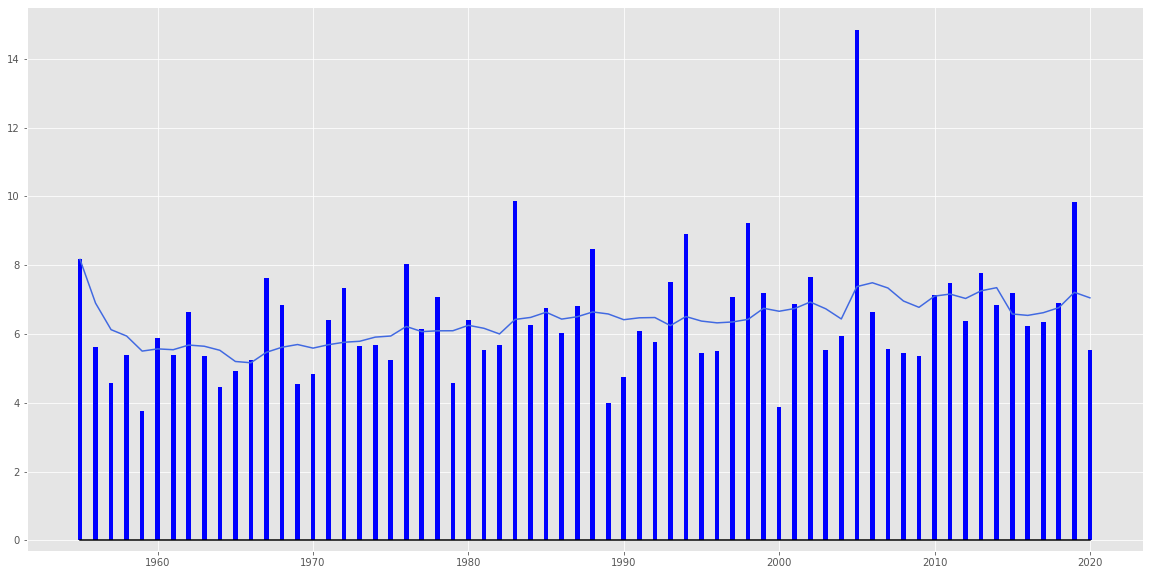

In [54]:
fig=plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
plt.ylim([-0.3,15.5])
plt.bar(overall_prcp.YEAR, overall_prcp.Rain_Indicator,color="blue",width=0.3)
plt.plot(overall_prcp.YEAR,overall_prcp.Rolling_Avg,color="royalblue")
plt.plot([1955,2020],[0,0], color = 'black')

### __Interpretation of the graph__


Observing the graph we can see that the year with the most rain concentrated bursts in Athens was 2005 and the least concentrated rain burst were gathered in 2000. Generally we see that in Athens the rain concentrated bursts are not exceed 8 mm with only a few exceptions in 1983 , 1988 ,and 2005.